# Catchment Area normalized satellite data

## Import packages

In [35]:
import stackstac
import geopandas as gpd
from pystac_client import Client
import planetary_computer as pc
import rasterio
import os

import rioxarray
import geopandas
from shapely.geometry import mapping
from netCDF4 import Dataset
import matplotlib.pyplot as plt


## File locations

In [22]:
directory = '/Users/niekcollotdescury/Desktop/Applied data science/Thesis/R_code/data/satellite_data/'
grace_dir = directory + 'GRACE/'
sm_dir    = directory + 'ESA/'
modis_dir = directory + 'MODIS/'

grace_file = 'lwe_thickness_GRACE_data_meter.nc'
sm_file    = 'monmean_sm_ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED_1978-2019.nc'
modis_file = 'GHRM5C_1978-2021_float32_masked_monthly_30min.nc'

### Catchment areas

In [23]:
locations = ['basel', 'lobith', 'cochem']

# Satellite grid areas

In [29]:
os.chdir(directory)
folder = ['GRACE', 'ESA', 'MODIS']
files = [grace_file, sm_file, modis_file]
for i in range(3):
    os.system(f'cdo gridarea {folder[i]}/{files[i]} {folder[i]}/gridarea.nc')   

lwe_thickness
basel lwe_thickness
<xarray.DataArray 'lwe_thickness' (time: 183, y: 3, x: 7)>
array([[[        nan,         nan,         nan, ...,  0.11355558,
          0.17127072,  0.17127072],
        [        nan,  0.11355558,  0.11355558, ...,  0.11355558,
          0.17127072,  0.17127072],
        [ 0.11355558,  0.11355558,  0.11355558, ...,  0.11355558,
          0.17127072,  0.17127072]],

       [[        nan,         nan,         nan, ...,  0.13407292,
          0.16089013,  0.16089013],
        [        nan,  0.13407292,  0.13407292, ...,  0.13407292,
          0.16089013,  0.16089013],
        [ 0.13407292,  0.13407292,  0.13407292, ...,  0.13407292,
          0.16089013,  0.16089013]],

       [[        nan,         nan,         nan, ...,  0.03003951,
          0.0587719 ,  0.0587719 ],
        [        nan,  0.03003951,  0.03003951, ...,  0.03003951,
          0.0587719 ,  0.0587719 ],
        [ 0.03003951,  0.03003951,  0.03003951, ...,  0.03003951,
          0.0587719 ,

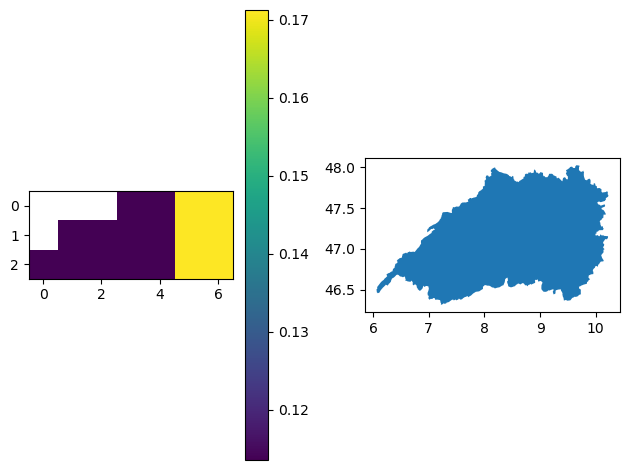

lobith lwe_thickness
<xarray.DataArray 'lwe_thickness' (time: 183, y: 11, x: 12)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.10484728, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.10484728, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.11355558, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.0984309 , ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.0984309 , ...,         nan,
                 nan,

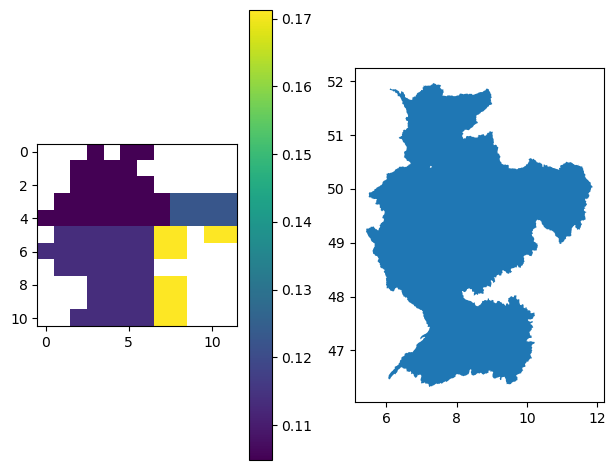

cochem lwe_thickness
<xarray.DataArray 'lwe_thickness' (time: 183, y: 5, x: 5)>
array([[[        nan,  0.10484728,  0.10484728,         nan,
                 nan],
        [ 0.10484728,  0.10484728,  0.10484728,         nan,
                 nan],
        [        nan,  0.11355558,  0.11355558,  0.11355558,
          0.11355558],
        [ 0.11355558,  0.11355558,  0.11355558,         nan,
                 nan],
        [        nan,  0.11355558,  0.11355558,         nan,
                 nan]],

       [[        nan,  0.0984309 ,  0.0984309 ,         nan,
                 nan],
        [ 0.0984309 ,  0.0984309 ,  0.0984309 ,         nan,
                 nan],
        [        nan,  0.13407292,  0.13407292,  0.13407292,
          0.13407292],
        [ 0.13407292,  0.13407292,  0.13407292,         nan,
                 nan],
        [        nan,  0.13407292,  0.13407292,         nan,
...
                 nan],
        [-0.04874722, -0.04874722, -0.04874722,         nan,
             

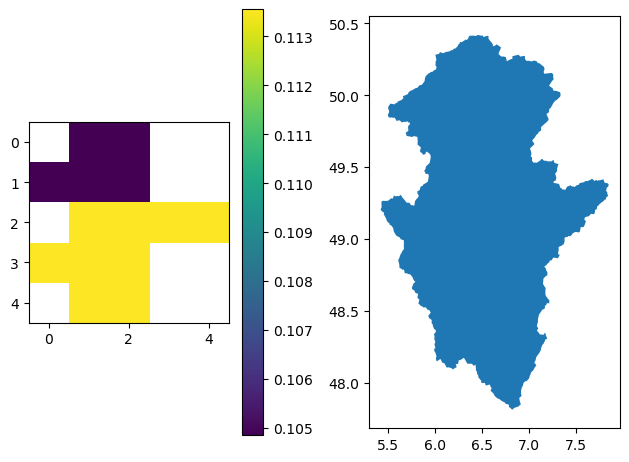

sm
basel sm
<xarray.DataArray 'sm' (time: 494, y: 7, x: 15)>
array([[[       nan,        nan,        nan, ..., 0.29570693,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
         0.3131179 , 0.33053386],
        [       nan,        nan,        nan, ..., 0.30054998,
         0.32121837,        nan],
        ...,
        [0.32051402,        nan, 0.303388  , ...,        nan,
                nan,        nan],
        [       nan, 0.3138567 , 0.33401877, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [0.32798615, 0.32234606, 0.3063422 , ..., 0.3100

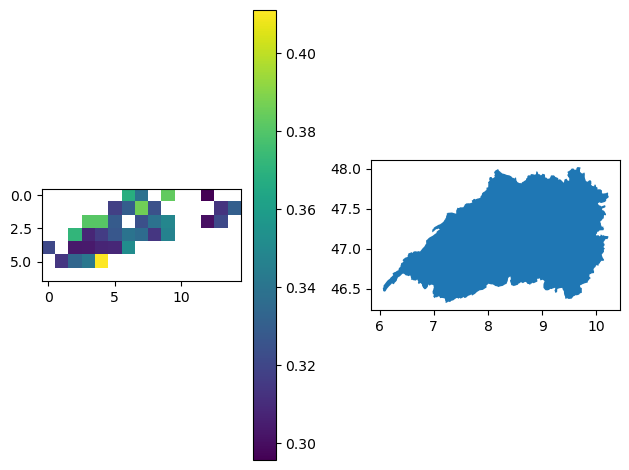

lobith sm
<xarray.DataArray 'sm' (time: 494, y: 23, x: 25)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan,

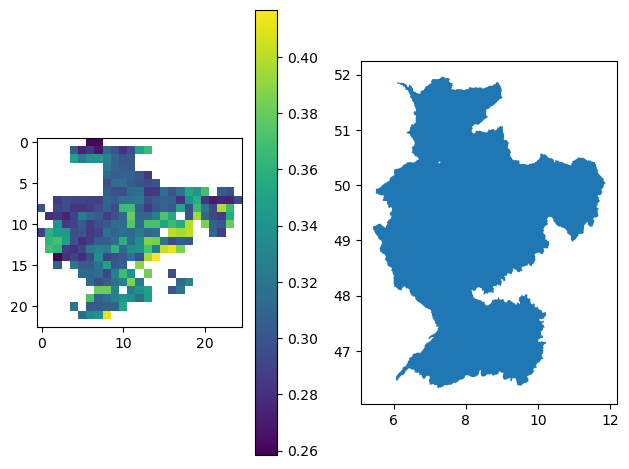

cochem sm
<xarray.DataArray 'sm' (time: 494, y: 11, x: 9)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.28491223, ..., 0.28979912,
                nan,        nan],
        [0.29937378,        nan, 0.2909865 , ..., 0.2866972 ,
                nan,        nan],
        ...,
        [       nan,        nan, 0.25839034, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.30696228, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan, 0.3073889 , ...,        n

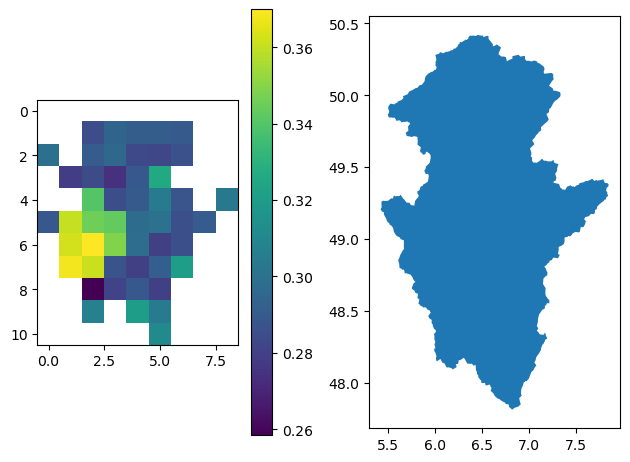

snow_fraction
basel snow_fraction
<xarray.DataArray 'snow_fraction' (time: 511, y: 3, x: 7)>
array([[[       nan,        nan,        nan, ..., 0.74675643,
         0.56744593, 0.6030604 ],
        [       nan, 0.8870624 , 0.8231265 , ..., 0.7724941 ,
         0.80645055, 0.79711837],
        [0.8155569 , 0.8914239 , 0.92624414, ..., 0.9713167 ,
         0.95752895, 0.950116  ]],

       [[       nan,        nan,        nan, ..., 1.        ,
         1.        , 1.        ],
        [       nan, 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 0.99498844, ..., 1.        ,
         1.        , 1.        ]],

       [[       nan,        nan,        nan, ..., 0.89549136,
         0.757464  , 0.730072  ],
        [       nan, 0.90304387, 0.9556206 , ..., 0.73334473,
         0.78524774, 0.8275708 ],
        [0.7910354 , 0.91638625, 0.9787993 , ..., 0.9844113 ,
         0.949446  , 0.9650812 ]],
...
       [[       nan,        nan,  

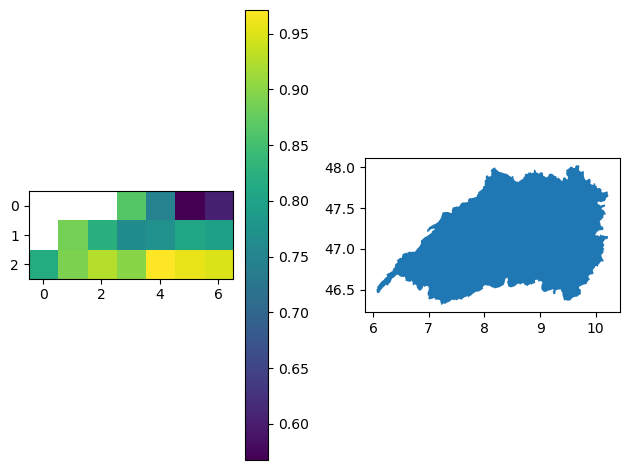

lobith snow_fraction
<xarray.DataArray 'snow_fraction' (time: 511, y: 11, x: 12)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.9893733 , ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.9536565 , ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.8155569 , ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 1.        , ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.99999994, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,   

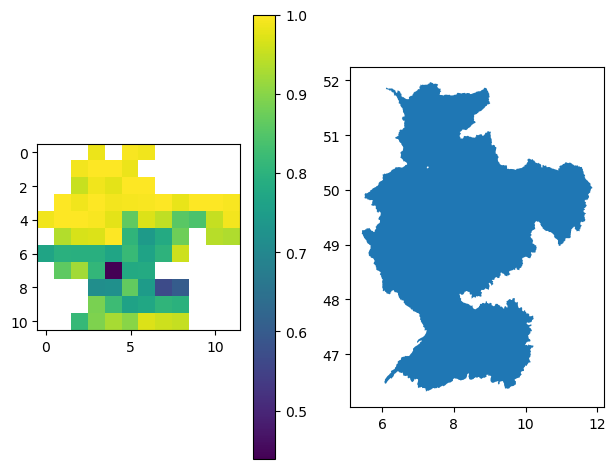

cochem snow_fraction
<xarray.DataArray 'snow_fraction' (time: 511, y: 5, x: 5)>
array([[[       nan, 1.        , 0.9887205 ,        nan,        nan],
        [0.9881556 , 1.        , 1.        ,        nan,        nan],
        [       nan, 0.9349303 , 0.96553797, 0.9706994 , 1.        ],
        [0.76574355, 0.7944356 , 0.7928112 ,        nan,        nan],
        [       nan, 0.8612836 , 0.92241853,        nan,        nan]],

       [[       nan, 1.        , 1.        ,        nan,        nan],
        [1.        , 1.        , 1.        ,        nan,        nan],
        [       nan, 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ,        nan,        nan],
        [       nan, 1.        , 1.        ,        nan,        nan]],

       [[       nan, 1.        , 1.        ,        nan,        nan],
        [1.        , 1.        , 0.94379187,        nan,        nan],
        [       nan, 0.9200296 , 0.86004114, 0.9758742 , 0.9550474 ],
      

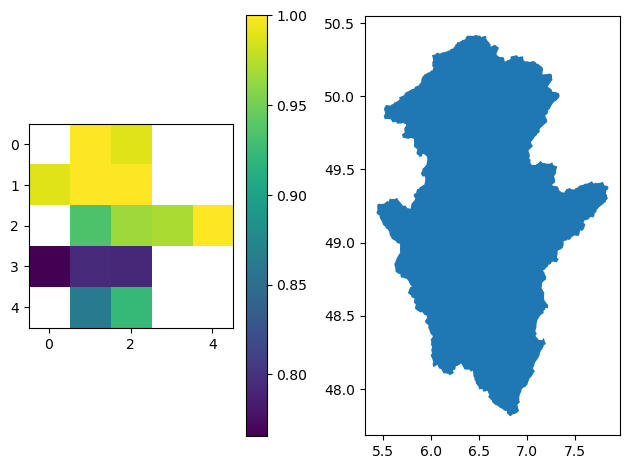

In [39]:
def watershed_normalized(locations, directory, sat, file, var):
    curr_file = f'{directory}{sat}/{file}'
    xds = rioxarray.open_rasterio(curr_file)
    xds.rio.write_crs("epsg:4326", inplace=True)
    
    gridarea = rioxarray.open_rasterio(f'{directory}{sat}/gridarea.nc')
    gridarea.rio.write_crs("epsg:4326", inplace=True)
    
    nc = Dataset(curr_file)
    fill_value = nc.variables[var]._FillValue
    
    
    print(var)
    for location in locations:
        print(location, var)
        # Open watershed area
        
        watershed = directory + f'{location}/stationbasins.geojson'
        geodf = geopandas.read_file(watershed)
        
        #Clip satellite data and watershed area
        clipped = xds.rio.clip(geodf.geometry.apply(mapping), geodf.crs)
        clipped = clipped.where(clipped != fill_value) # change negative values (outside area of interest to nan)
        print(clipped)
        # Clip gridarea
        gridarea_clipped = gridarea.rio.clip(geodf.geometry.apply(mapping), geodf.crs)
        
        # Multiply satellite data by with the cell area
        clipped_area = clipped * gridarea_clipped[0,:,:]
        
        # Normalize satellite data with the sum of the grid area
        area_averaged_sum  = clipped_area.groupby('time').sum(...) / gridarea_clipped[0,:,:].sum()
        
        df = area_averaged_sum.to_dataframe(name = var)
        df = df.drop(['spatial_ref', 'band'], axis = 1)        
        df.to_csv(f'{directory}combined/{var}_{geodf.GRDC_NO.values[0]}.csv')
        
        fig, ax = plt.subplots(nrows = 1, ncols =2, )
        z = ax[0].imshow(clipped[0,:,:])
        plt.colorbar(z, ax= ax[0])
        geodf.plot(ax = ax[1])
        plt.tight_layout()
        plt.show()
path = directory + 'combined'
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(path)
   print("The new directory is created!")
          
watershed_normalized(locations, directory, 'GRACE',grace_file, 'lwe_thickness')
watershed_normalized(locations, directory, 'ESA',sm_file, 'sm')
watershed_normalized(locations, directory, 'MODIS', modis_file, 'snow_fraction')
